

## Problem Statement


You have been hired by the stakeholders of Dream Housing Finance company to help them get visual insights on the company's operations. 

Using the data visualization techniques you learned, you have to help visualise the data and see if you can help the stakeholders arrive at some inference based on the visual plots.


## About the Dataset


The snapshot of the data, you will be working on:


![loan_data](https://storage.googleapis.com/ga-commit-live-prod-live-data/account/b92/11111111-1111-1111-1111-000000000000/b981/855877f6-eb24-4ccd-84b9-fdacd04d8605/file.PNG)


The dataset has details of 614 customers with the following 13 features

|Feature|Description|
|-----|-----|
|Loan_ID|Unique Loan ID|
|Gender|Male/Female|
|Married|Applicant Married (Y/N)|
|Dependents|Number of dependents|
|Education|Graduate/Under Graduate|
|Self_Employed|Self employed (Y/N)|
|ApplicantIncome|Income of the applicant|
|CoapplicantIncome|Income of the co applicant|
|LoanAmount|Loan amount in thousands|
|Loan_Amount_Term|Term of loan in months|
|Credit_History|credit hostory meets guidelines}|
|Property_Area| Urban/Semi-Urban/Rural|
|Loan_Status|Loan approved (Y/N)|

## Why solve this project?

After completing this project, you will have a better understanding of data visualization techniques. In this project, you will be applying the following concepts:

- Bar plotting   
- Scatter plotting 
- Kernel Density plotting
- Subplot operations
- Axes modifications





# Loan Status
Let's start with the simple task of visualizing the company's record with respect to loan approvals.

* The path to the dataset has been stored in a variable `path`

* Load the dataframe using `pd.read_csv()` and store the dataframe in a variable called `data`.


* Save the value counts of `Loan_Status` in a variable called `loan_status` using `value_counts()`


* Plot a bar graph of `loan_status`


#### Things to ponder upon: 
      - Company has more 'loan approvals' or 'loan disapprovals'?
      - Can one of the company's health factors be its loan status distribution?

In [2]:
#Importing header files
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
os.listdir()

['.ipynb_checkpoints', 'Visualization-solution.ipynb', 'Visualization.ipynb']

In [4]:
path = '../data/data.csv'

#Reading the file
data=pd.read_csv(path)

#Creating a new variable to store the value counts
loan_status=data['Loan_Status'].value_counts()

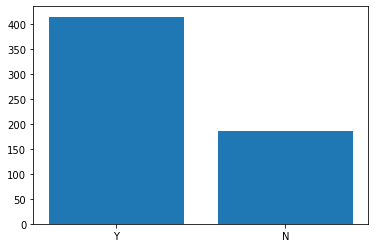

In [5]:
#Plotting bar plot
plt.bar(loan_status.index, loan_status)
plt.show()


# Everyone needs money 
The company provides financial assistance across the different regions of the country. One interesting statistic that stakeholders want to see is the loan approval distribution across the regions.

## Instructions :

* Group the `'data'` dataframe by `Property_Area` and `Loan_Status` and store it in a  variable called `'property_and_loan'`


* Use the `.size()` method on `'property_and_loan'` and then use `.unstack()` and save it back to `'property_and_loan'` 


* Plot an unstacked bar plot of `property_and_loan` (It is similar to creating a stacked bar plot except change the parameter `'stacked'` to False)


* Name the x-axis as `Property Area` 


* Name the y-axis as `Loan Status` 


* Rotate the labels of x-axis by 45<sup>o</sup> 


### Things to ponder upon 

    - Which is the region with the highest no. of loan approvals? lowest no. of loan approvals?

    - Which is the region with the maximum difference between loan approvals and loan rejections?

In [11]:
property_and_loan = data.groupby(['Property_Area','Loan_Status'])
property_and_loan = property_and_loan.size().unstack()

property_and_loan

Loan_Status,N,Y
Property_Area,,
Rural,68,109
Semiurban,51,175
Urban,66,131


(array([0, 1, 2]),
 [Text(0, 0, 'Rural'), Text(1, 0, 'Semiurban'), Text(2, 0, 'Urban')])

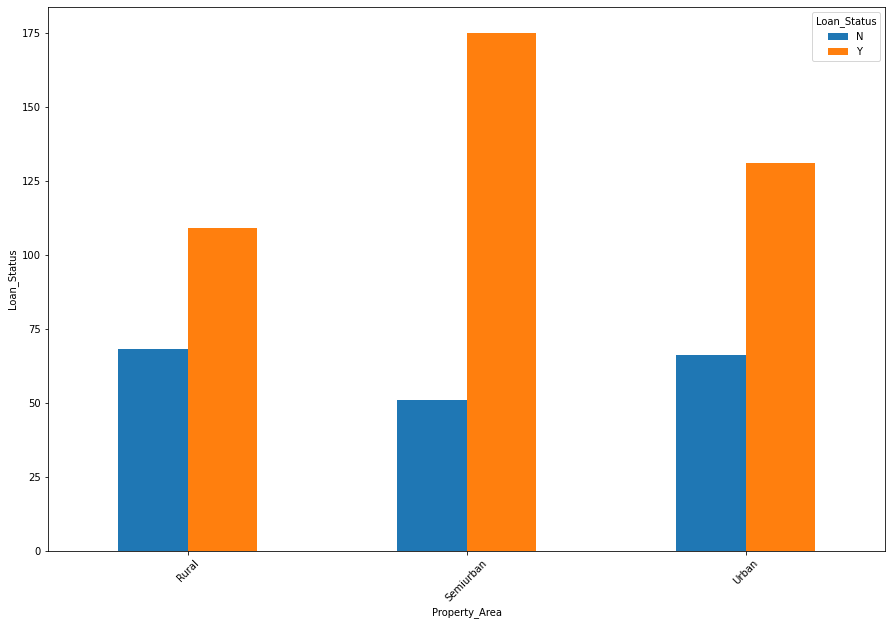

In [18]:
property_and_loan.plot(kind='bar', stacked=False, figsize=(15,10))

#Changing the x-axis label
plt.xlabel('Property_Area')

#Changing the y-axis label
plt.ylabel('Loan_Status')

#Rotating the ticks of X-axis
plt.xticks(rotation=45)

# Expensive Education
Higher education has always been an expensive endeavour for people but it results in better career opportunities and stability in life. But does higher education result in a better guarantee in issuing loans? 

## Instructions :

* Group the `'data'` dataframe by `Education` and `Loan_Status` and store it in a  variable called `'education_and_loan'`


* Use the `.size()` method on `'education_and_loan'` and then use `.unstack()` and save it back to `'education_and_loan'` 


* Plot an stacked bar plot of `education_and_loan`


* Name the x-axis as `Education Status` 


* Name the y-axis as `Loan Status` 


* Rotate the labels of x-axis by 45<sup>o</sup> 

#### Things to ponder upon
    - Overall which group has asked for higher loan services irrespective of the approval? Graduate or Non-Graduate?
    - Which group has had better approval to non-approval ratio? Graduate or Non-Graduate?
    
      Do the above conclusions make sense? Why?

(array([0, 1]), [Text(0, 0, 'Graduate'), Text(1, 0, 'Not Graduate')])

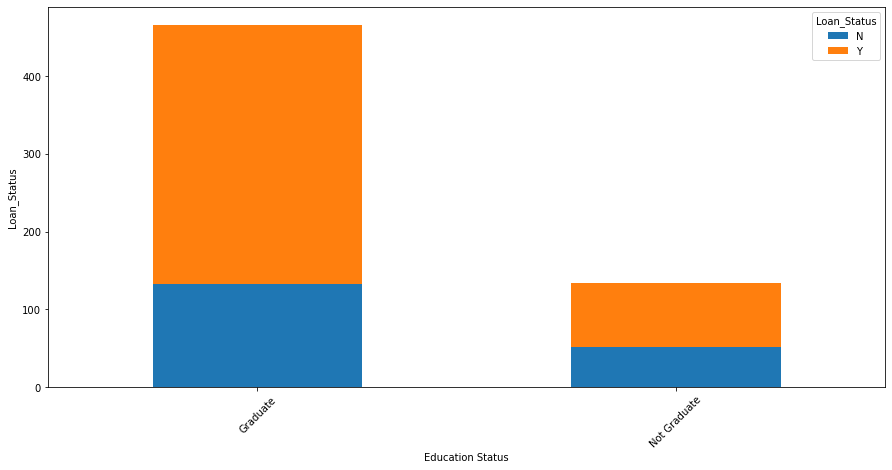

In [21]:
education_and_loan = data.groupby(['Education', 'Loan_Status'])
education_and_loan = education_and_loan.size().unstack()

education_and_loan.plot(kind='bar', stacked=True, figsize=(15,7))

#Changing the x-axis label
plt.xlabel('Education Status')

#Changing the y-axis label
plt.ylabel('Loan_Status')

#Rotating the ticks of X-axis
plt.xticks(rotation=45)



# Smarter and Richer? 

After seeing the loan status distribution, let's check whether being graduate or not also leads to different loan amount distribution by plotting an overlapping density plot of two values

## Instructions :

* Create a dataframe called 'graduate' which is a subset of `'data'` dataframe with the condition `"data['Education'] == 'Graduate'"`


* Create a dataframe called 'not_graduate' which is a subset of `'data'` dataframe with the condition `"data['Education'] == 'Not Graduate'"`


* Plot a density plot `LoanAmount` of `'graduate'` dataframe using `"Series.plot()"` and pass the parameter `kind`='density' and `label`='Graduate'


* Do the same for `LoanAmount` of `'not_graduate'` dataframe but with `label`='Not Graduate'



#### Things to ponder upon
    - Do Graduate people get approved a higher amount than their Non Graduate counterparts?
    
    - What's the average amount of loan approved for Graduate? for Non-Graduate? Is there a huge difference between the two? 




In [23]:
data['Education'] == 'Graduate'

0       True
1       True
2       True
3      False
4       True
       ...  
595     True
596     True
597     True
598     True
599     True
Name: Education, Length: 600, dtype: bool

In [22]:
graduate = data[data['Education'] == 'Graduate']
not_graduate = data[data['Education'] == 'Not Graduate']

not_graduate

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
15,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
17,LP001038,Male,Yes,0,Not Graduate,No,4887,0.0,133.0,360.0,1.0,Rural,N
19,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,LP002940,Male,No,0,Not Graduate,No,3833,0.0,110.0,360.0,1.0,Rural,Y
583,LP002941,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,N
587,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y
591,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N


In [25]:
graduate['LoanAmount']

0        NaN
1      128.0
2       66.0
4      141.0
5      267.0
       ...  
595     71.0
596     40.0
597    253.0
598    187.0
599    133.0
Name: LoanAmount, Length: 466, dtype: float64

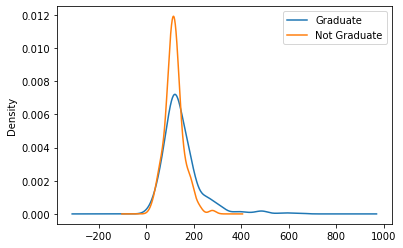

In [26]:
#Plotting density plot for 'Graduate'
graduate['LoanAmount'].plot(kind='density', label='Graduate')

#Plotting density plot for 'Non Graduate'
not_graduate['LoanAmount'].plot(kind='density',label='Not Graduate')

#For automatic legend display
plt.legend()

# Income vs Loan

For any financial institution to be successful in its loan lending system, there has to be a correlation between the borrower's income and loan amount he is lent. Let's see how our company fares in that respect:

## Instructions :

* Create three subplots  with `(nrows = 3 , ncols = 1)` and store it in variable's `fig ,(ax_1,ax_2,ax_3)`

* Since both are continuous variables, plot scatter plot between `'ApplicantIncome'` and `LoanAmount` using `ax_1`. Set axis title as `Applicant Income`


* Plot scatter plot between `'CoapplicantIncome'` and `LoanAmount` using `ax_2`. Set axis title as `Coapplicant Income` 


* Create a new column in the dataframe called `'TotalIncome'` which is a sum of the values of columns `ApplicantIncome` and `CoapplicantIncome`


* Plot scatter plot between `'TotalIncome'` and `LoanAmount` using `ax_3`. Set axis title as `Total Income` 

 

#### Things to ponder upon
    - Is there a correlation between 'ApplicantIncome' and 'LoanAmount'?(One way to know that is looking at the line formed when you connect the scatter plot dots?)
    
    - Is the 'TotalIncome' better related to the 'LoanAmount' than 'ApplicantIncome'?



<class 'pandas.core.series.Series'>


[Text(0.5, 1.0, 'Total Income')]

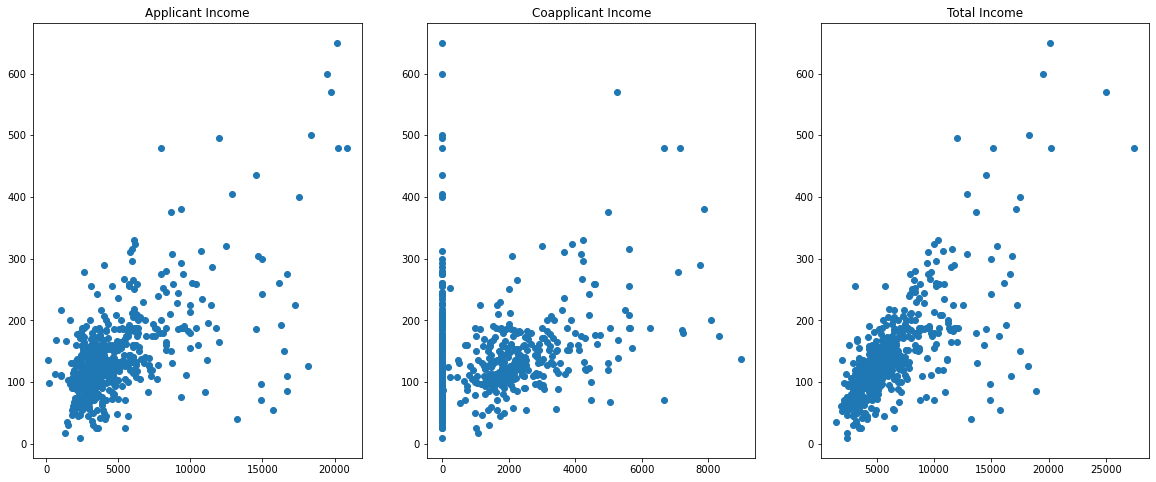

In [29]:
#Code starts here

#Setting up the subplots
fig, (ax_1, ax_2,ax_3) = plt.subplots(1,3, figsize=(20,8))

#Plotting scatter plot
ax_1.scatter(data['ApplicantIncome'],data["LoanAmount"])

#Setting the subplot axis title
ax_1.set(title='Applicant Income')


#Plotting scatter plot
ax_2.scatter(data['CoapplicantIncome'],data["LoanAmount"])

#Setting the subplot axis title
ax_2.set(title='Coapplicant Income')


#Creating a new column 'TotalIncome'
data['TotalIncome']= data['ApplicantIncome']+ data['CoapplicantIncome']
print (type(data['ApplicantIncome']))

#Plotting scatter plot
ax_3.scatter(data['TotalIncome'],data["LoanAmount"])

#Setting the subplot axis title
ax_3.set(title='Total Income')


#Code ends here

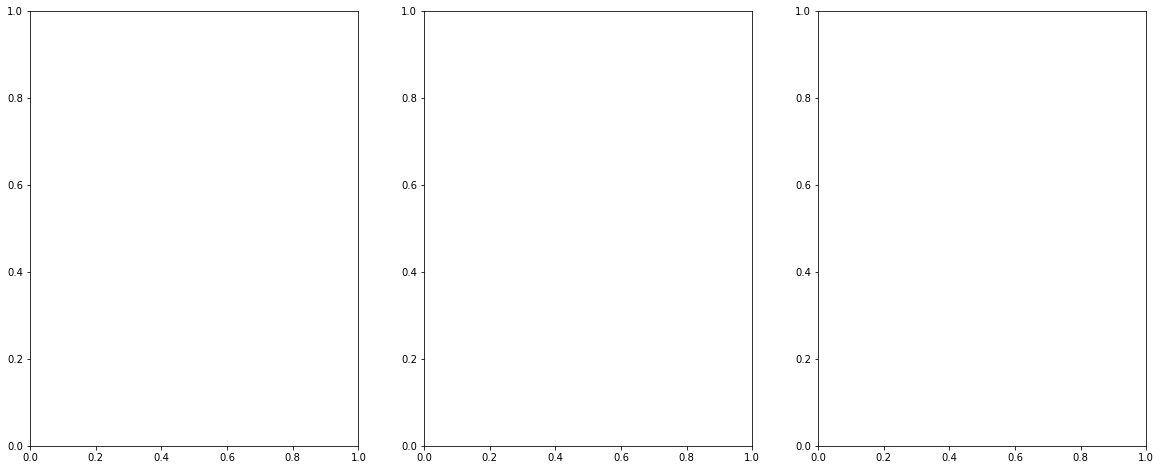

In [27]:
fig, (ax_1, ax_2, ax_3) = plt.subplots(1,3, figsize=(20,8))


In [ ]:
ax_1.scatter(data['ApplicantIncome'],data["LoanAmount"])
